In [56]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1]) # X.shape[1]: n_features
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [11]:
a = np.array([[1,2],[3,4]])

In [13]:
a.shape

(2, 2)

In [16]:
for a in zip([1,2],[3,4]):
    print(a)

(1, 3)
(2, 4)


In [18]:
np.zeros(2)

array([ 0.,  0.])

In [22]:
print(np.dot.__doc__)

dot(a, b, out=None)

    Dot product of two arrays.

    For 2-D arrays it is equivalent to matrix multiplication, and for 1-D
    arrays to inner product of vectors (without complex conjugation). For
    N dimensions it is a sum product over the last axis of `a` and
    the second-to-last of `b`::

        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

    Parameters
    ----------
    a : array_like
        First argument.
    b : array_like
        Second argument.
    out : ndarray, optional
        Output argument. This must have the exact kind that would be returned
        if it was not used. In particular, it must have the right type, must be
        C-contiguous, and its dtype must be the dtype that would be returned
        for `dot(a,b)`. This is a performance feature. Therefore, if these
        conditions are not met, an exception is raised, instead of attempting
        to be flexible.

    Returns
    -------
    output : ndarray
        Returns the dot product of `a` an

In [23]:
a

(2, 4)

In [25]:
np.dot(np.array([[2,3],[4,5]]), np.array([1,2]))

array([ 8, 14])

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


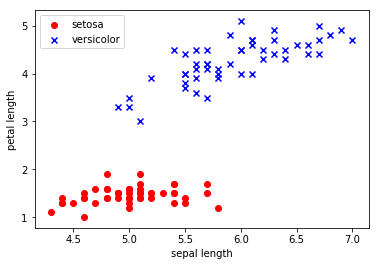

In [5]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

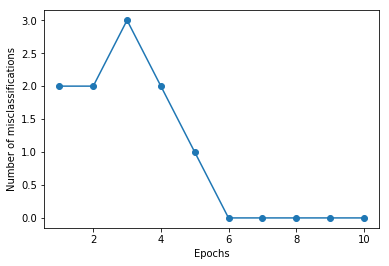

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

<class 'numpy.ndarray'>
----
[4 5]


/Users/nryotaro/.pyenv/versions/anaconda3-4.3.1/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 2


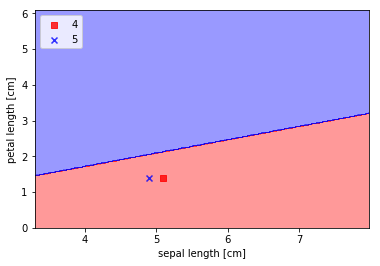

In [98]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),  np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)   # Return a contiguous flattened array.
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
rint(type(y))
    print('----')
    print(np.unique(y))
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
        

In [95]:
np.meshgrid([1,2],[3,4])

[array([[1, 2],
        [1, 2]]), array([[3, 3],
        [4, 4]])]

In [34]:
np.arange(1,2,0.1)

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9])

In [46]:
a = np.array([[1,2],[3,4]])

In [51]:
a

array([[1, 2],
       [3, 4]])

In [54]:
np.linspace(0,1,2)

array([ 0.,  1.])

In [60]:
x = np.array([1,2,3]) 
y = np.array([4,5])

In [62]:
xx, yy = np.meshgrid(x,y)

In [67]:
xx

array([[1, 2, 3],
       [1, 2, 3]])

In [68]:
yy

array([[4, 4, 4],
       [5, 5, 5]])

In [72]:
np.meshgrid(y, x)

[array([[4, 5],
        [4, 5],
        [4, 5]]), array([[1, 1],
        [2, 2],
        [3, 3]])]

In [73]:
xx

array([[1, 2, 3],
       [1, 2, 3]])

In [75]:
xx.ravel()

array([1, 2, 3, 1, 2, 3])

In [78]:
 a = np.zeros((10, 2))

In [79]:
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [80]:
a.T

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [86]:
np.arange(6).reshape(2,3)

array([[0, 1, 2],
       [3, 4, 5]])